# Predicting the likelihood of e-signing a loan based on financial history  

대출신청자의 신용거래 실적을 분석하여 지원자의 위험성 여부를 판단
위험하지않다면 대출을 해주고 대출조건을 결정  
  
P2P 마켓플레이스 = 다수의 대출신청인을 모집하여 대부업체와 연결해주는 중개업자 기능하는 웹사이트  
이 프로젝트는 마켓플레이스로부터 받는 지원자들의 질을 평가하는 것  
대출이 관심사가 아니라 지원자들의 자격에 관심  
양질의 지원자는 대출지원과정에서 특정 화면(전자서명;e-signing)에 접속할 수 있는 사람을 의미  

<span style="color:blue">
 Goal : Develop an model to predict for 'quality' applicants  
</span>

**지원자가 전자서명을 완료하는지의 여부를 예측하는 모델을 만드는게 목표**  
이 모델을 활용해서 P2P마켓플레이스를 통해 오는 어떤 지원자가 대출에 관심이 큰지 아닌지 여부를 식별하기 위함  
  
프로세스
1. 대출지원자가 P2P마켓플레이스에 온다
2. 지원자들은 정보를 제공(온보딩 과정)해 다양한 대출제의를 받거나, 어떤 대출방식이 적합한지 등의 정보를 받는다.
3. 이런 제의가 주어지기 전(정보 제공 후) 정보가 마켓플레이스에서 처리되어 대부업체로 넘어간다.
4. 대부업체는 지원자의 대출여부를 결정, 주로 부동산 있는 경우 통과
5. 통과한 지원자가 대출받기로 결정했다면 대부업체사이트로 연결되어 공식 대출과정을 시작  
  
### 이 프로젝트는 지원자들이 정보를 채우다 마지막 단계인 전자서명단계를 마치는지 아닌지를 통해 지원자의 흥미(대출받는데에 관심)를 식별  
### 즉, 온보딩 마지막 과정인 전자서명까지 도달할 정도로 관심있는지 측정



entry_id : 유저 식별자  
age : 나이, 18세 이상 신청가능  
pay_schedule : 돈을 받는 빈도
home_owner : 자택 보유자, 0 = 주택을 임대했거나 기숙사 등에 사는 경우  
income : 소득  
months_employed, years_employed : 직장에서 얼마나 일했는지    
current_address_year : 현재 주소에서 얼마나 거주했는지  
personal_account_m, personal_account_y : 개인 계좌를 가진지 얼마나 되었는지  
has_debt : 빚이 있는지 여부  
amount_requested : 원하는 대출 금액  
risk_score_1~5 : 제공되는 정보, 유저가 대출을 갚을 가능성 평가, 실제 대출받을지와는 무관  
ext_quality_score, ext_quality_score_2 : 마켓플레이스에서 제공한 점수  
inquiries_last_month : 유저가 지난 달에 한 문의 수, 신용점수 확인을 시행한 횟수  
e_signed : e 사인 완료시 1, 반응변수

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [25]:
dataset = pd.read_csv('input/P39-Financial-Data.csv')

# EDA

In [26]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [27]:
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [28]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


age : 18세 ~ 96세사이, 중앙값은 42세  
home_owner : 중앙값 = 0이나 75% = 1, 평균 = 42% 꽤 균등하게 퍼져있음  
months_employed : min = 0 = 1개월째
years_employed : min = 0 = 1년이 되지않음  
has_debt : 79%가 빚이 있다
e_signed : 53%가 전자서명 완료, 균형잡혀있음

## cleaning data

In [29]:
# removing NaN
dataset.isna().any()

# na value = 0

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

## Histograms

In [30]:
dataset2 = dataset.drop(columns = ['entry_id', 'e_signed', 'pay_schedule'])
dataset2.columns

Index(['age', 'home_owner', 'income', 'months_employed', 'years_employed',
       'current_address_year', 'personal_account_m', 'personal_account_y',
       'has_debt', 'amount_requested', 'risk_score', 'risk_score_2',
       'risk_score_3', 'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month'],
      dtype='object')

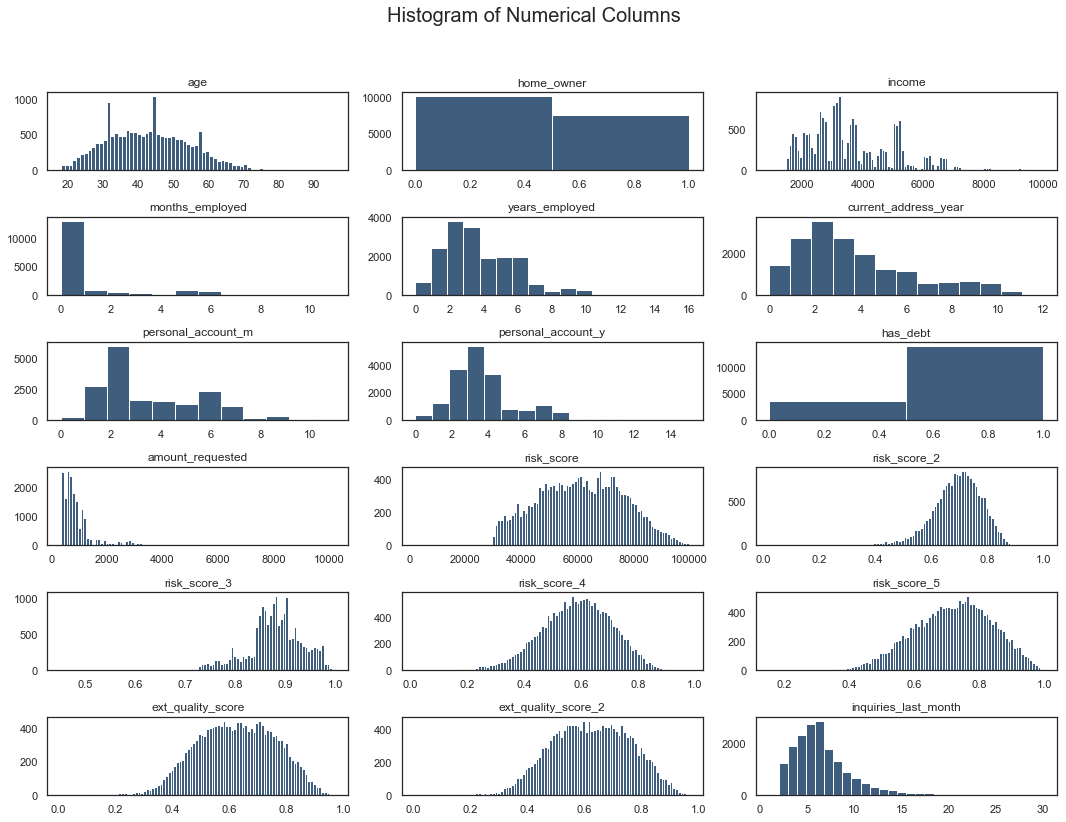

In [31]:
fig = plt.figure(figsize = (15,12))
plt.suptitle('Histogram of Numerical Columns', fontsize = 20)
for i in range(dataset2.shape[1]):
    plt.subplot(6,3,i+1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    
    vals = np.size(dataset2.iloc[:,i].unique())
    # 모든 변수의 값을 다 그리지 않도록 bin에 제한을 둠
    if vals >=100:
        vals = 100
        
    plt.hist(dataset2.iloc[:,i], bins=vals, color='#3F5D7D')
# 그래프가 겹치지 않도록 레이어의 rect설정
plt.tight_layout(rect = [0, 0.03, 1, 0.95])

age : 골고루 분포되어보임  
home_owner : 이진변수로 2개의 막대가 보임, 골고루 분포되었다고 봄  
income : 최상단부분 연결해보면 전반적인 정규분포를 볼 수 있음  
months_employed : 특정 범위에 몰려있음, 많은 유저들이 1년만 일함, 월단위가 정확히 0으로 끊김, 정확하지 않다고 가정  
has_debt : 이진변수  
risk_score : 전문가들에 의해 만들어진 점수로 분포가 꽤 안정적임  


## Correlation with Response Variables

#### corrwith() : 특정 컬럼에 대한 상관관계계수 표현


<AxesSubplot:title={'center':'Correlation with E Signed'}>

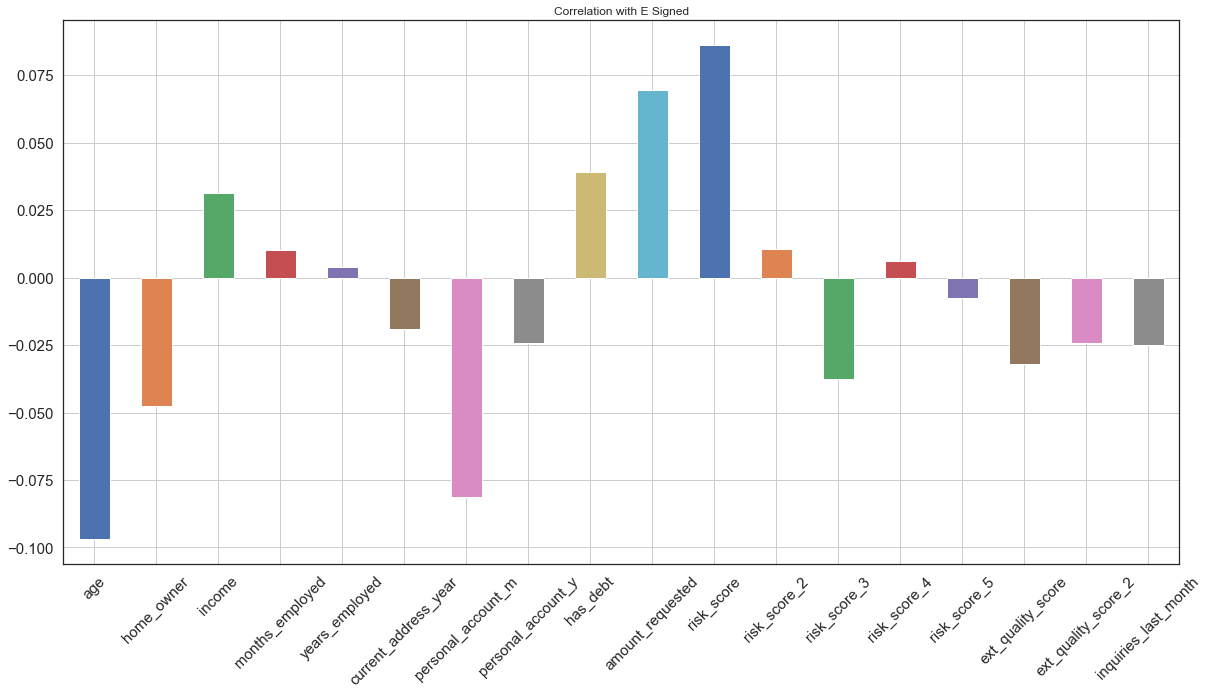

In [35]:
colors = sns.color_palette()
dataset2.corrwith(dataset.e_signed).plot.bar(
figsize = (20,10), title = "Correlation with E Signed", fontsize = 15,
rot = 45, grid = True, color = colors)

막대가 클수록 상관관계도 큼  
negative = 변수와 반응변수가 반비례  
  
age : neg, 나이가 많을수록 온보딩 과정과 마지막 단계를 놓침 
home_owner : neg, 집을 가지고 있을수록 마지막 단계에 가지 않음  
has_debt, amount_requested, risk_score : pos, 빚이 있으면, 금액이 높을수록, 초기 리스트 점수가 높을수록 마지막 단계를 할 가능성 높음  
inquiries_last_month : neg, 많을수록 마지막 단계 도달 어려움


## Correlation Matrix
#### corr() : 전체 컬럼에 대한 상관관계계수 표현

<AxesSubplot:>

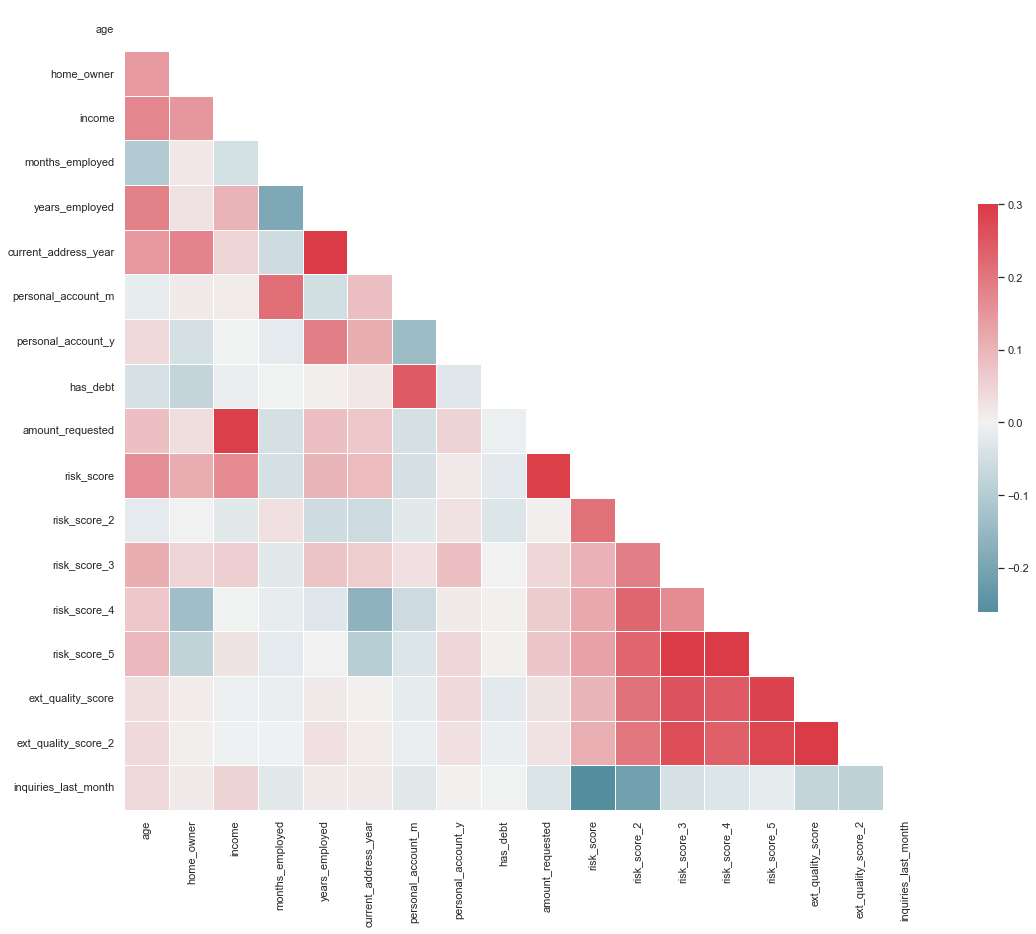

In [33]:
sns.set(style = 'white')

corr = dataset2.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (18,15))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,center=0,
           square = True, linewidths=.5, cbar_kws={"shrink": .5})

전체적으로 상관관계가 적다  
  
income과 amount_requested : 연관정도가 깊음, 월수입 많을수록 더 많은 대출요청가능  

years_employed, current_address_year : 연관성 높음, 같은 직업에 오래 종사한다면 직장 주변에 살게 될 것  
amount_requested,risk_score : 연관성 깊음
risk_score : risk점수 하나가 높다면 다른 risk 점수들도 높다  
-> 연관성이 잩어도 0.3정도라 제거하지 않음


In [37]:
dataset2.columns

Index(['age', 'home_owner', 'income', 'months_employed', 'years_employed',
       'current_address_year', 'personal_account_m', 'personal_account_y',
       'has_debt', 'amount_requested', 'risk_score', 'risk_score_2',
       'risk_score_3', 'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month'],
      dtype='object')